In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

from sklearn.svm import LinearSVC

In [2]:
irisDf = pd.read_csv(r"C:\Users\yug\Desktop\Projects\AIML\Training Regression Models\SVMs\iris.csv")
X = irisDf.iloc[:, :4]
y = irisDf.iloc[:, 4]
onlySetosa = (y == "setosa").astype(int)
irisDf.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

xTest = np.linspace([0,0,0,0],[6,4,2,1], 250)
svcPipeline = Pipeline([
    ("stdScaler", StandardScaler()),
    ("linearSVC", LinearSVC(penalty="l2", loss="hinge", C=0.1))
])
svcPipeline.fit(X,onlySetosa)

yPreds = svcPipeline.predict(xTest)
print(yPreds)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


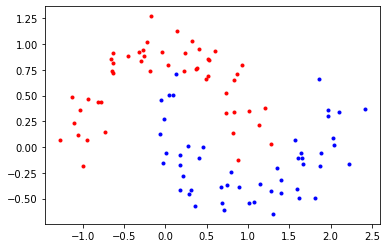

In [4]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
makeMoonsSet = make_moons(random_state=42, noise=0.15)
X = makeMoonsSet[0]
y = makeMoonsSet[1]

myPipeline = Pipeline([
    ("stdScaler", StandardScaler()),
    ("polyFeatures", PolynomialFeatures(degree=100)),
    ("LinSVC", LinearSVC(C=20))
])
myPipeline.fit(X,y)

plt.plot(X[:,0][y==0], X[:, 1][y==0], "r.")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "b.")
